In [1]:
from specim.specfuncs import spec1d
from keckcode.deimos import deimosmask1d
from specim_test.specim.specfuncs import spec2d
from astropy.io import fits

import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
file_loc = '../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/*'

In [3]:
file_list = []
#out_file = []
for i,p in enumerate(glob.glob(file_loc)):
    if 'spec1d' in p and  '0053m1' in p:
        if '.fits' in p:
            file_list.append(p)
            #frame = p.split('_')[-3][:4]
            #out_file.append('0053m1_r'+ frame + '_cleaned.fits')
            print(p)

../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec1d_r201213_0026a-0053m1_LRISr_2020Dec13T045626.045.fits
../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec1d_r201213_0026b-0053m1_LRISr_2020Dec13T045626.045.fits
../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec1d_r201213_0028-0053m1_LRISr_2020Dec13T071213.306.fits
../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec1d_r201213_0027-0053m1_LRISr_2020Dec13T062831.930.fits


In [10]:
for i, p in enumerate(file_list):
    if i==0:
        spec = deimosmask1d.DeimosMask1d(p)
        info = spec.slitinfo
        #print(info)
        #for i in range(spec1.nspec):
            #spec_id = '%d_%d_%d_%d' % (info['det'][i], info['slitid'][i], info['objid'][i], info['spatloc'][i])
            #specid.append(spec_id)
            #print(spec_id)
    else:
        spec1 = deimosmask1d.DeimosMask1d(p)
        info = spec1.slitinfo
        #print(info)
    if i!=0:
        spec = spec.coadd(spec1)
        info = spec.slitinfo
        #print(info)

Reading 5 spectra from:
  ../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec1d_r201213_0026a-0053m1_LRISr_2020Dec13T045626.045.fits
Reading 4 spectra from:
  ../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec1d_r201213_0026b-0053m1_LRISr_2020Dec13T045626.045.fits

Extracted spectra in exposure 1: 5
Extracted spectra in exposure 2: 4

Number of matched spectra in all 2 exposures: 4
Reading 4 spectra from input table and spectrum dictionary
Reading 5 spectra from:
  ../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec1d_r201213_0028-0053m1_LRISr_2020Dec13T071213.306.fits

Extracted spectra in exposure 1: 4
Extracted spectra in exposure 2: 5

Number of matched spectra in all 2 exposures: 4
Reading 4 spectra from input table and spectrum dictionary
Reading 5 spectra from:
  ../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec1d_r201213_0027-0053m1_LRISr_2020Dec13T062831.930.fits

Extracted spectra in exposure 1: 4
Extracted sp

In [4]:
spec1 = deimosmask1d.DeimosMask1d(file_list[2])
spec2 = deimosmask1d.DeimosMask1d(file_list[3])

Reading 5 spectra from:
  ../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec1d_r201213_0028-0053m1_LRISr_2020Dec13T071213.306.fits
Reading 5 spectra from:
  ../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec1d_r201213_0027-0053m1_LRISr_2020Dec13T062831.930.fits


In [5]:
spec = spec1.coadd(spec2)


Extracted spectra in exposure 1: 5
Extracted spectra in exposure 2: 5

Number of matched spectra in all 2 exposures: 5
Reading 5 spectra from input table and spectrum dictionary


In [6]:
spec3 = deimosmask1d.DeimosMask1d(file_list[0])

Reading 5 spectra from:
  ../galaxy_spectra/LRIS_red_data_201213/keck_lris_red_A/Science/spec1d_r201213_0026a-0053m1_LRISr_2020Dec13T045626.045.fits


In [7]:
spec = spec.coadd(spec3)


Extracted spectra in exposure 1: 5
Extracted spectra in exposure 2: 5

Number of matched spectra in all 2 exposures: 5
Reading 5 spectra from input table and spectrum dictionary


In [8]:
specid = [] #np.zeros(coadded_spectra.nspec)
info = spec.slitinfo
#print(info)
for i in range(spec.nspec):
    spec_id = '%d_%d_%d_%d' % (info['det'][i], info['slitid'][i], info['objid'][i], info['spatloc'][i])
    specid.append(spec_id)
    print(spec_id)

2_260_1_147
2_260_2_233
2_260_3_328
2_260_4_378
2_260_5_414


spec_id : 2_260_1_147


<IPython.core.display.Javascript object>


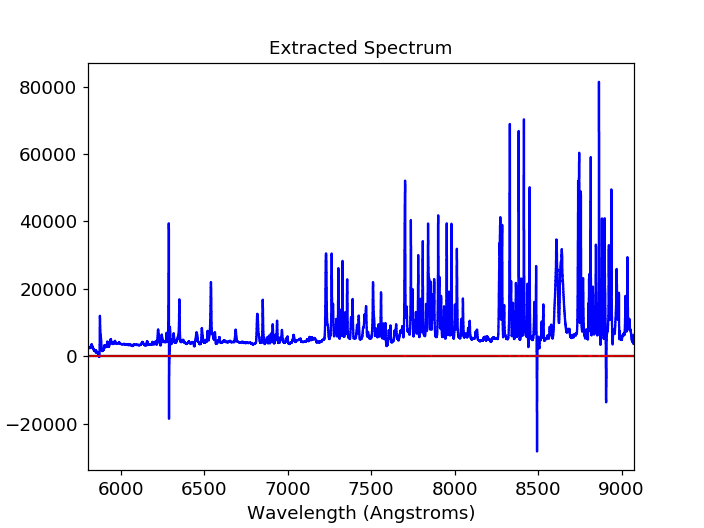

spec_id : 2_260_2_233


<IPython.core.display.Javascript object>


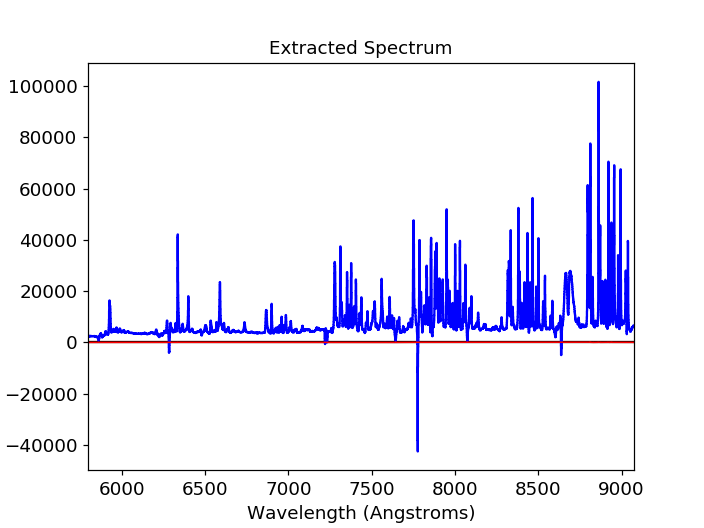

spec_id : 2_260_3_328


<IPython.core.display.Javascript object>


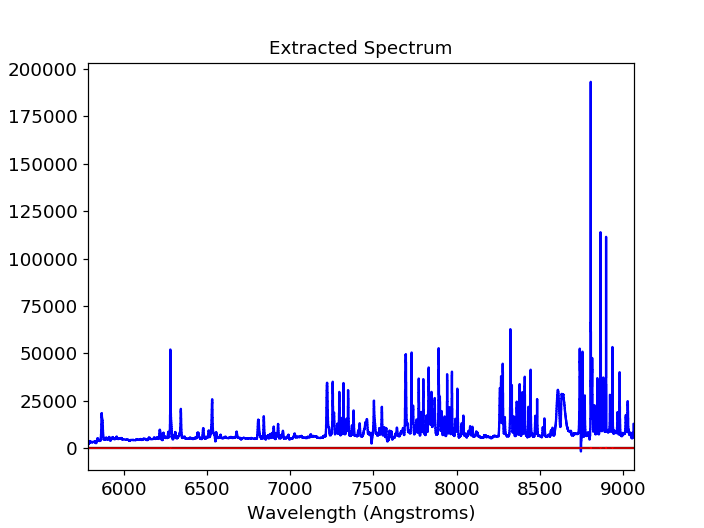

spec_id : 2_260_4_378


<IPython.core.display.Javascript object>


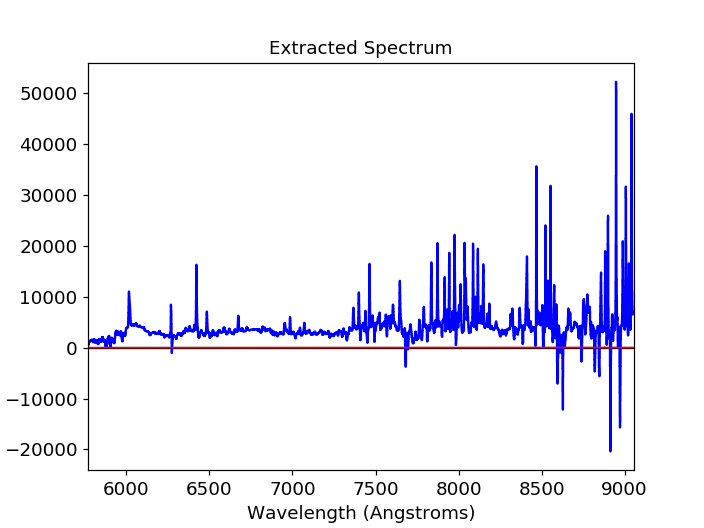

spec_id : 2_260_5_414


<IPython.core.display.Javascript object>


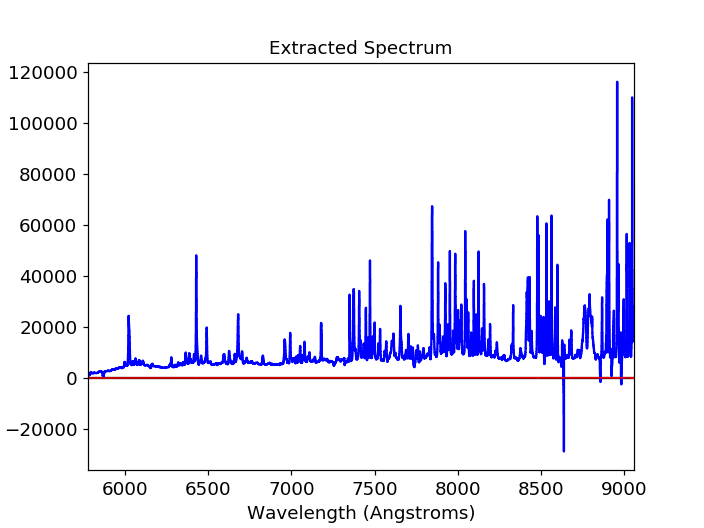

In [9]:
%matplotlib notebook

for i in range(len(specid)):
    print('spec_id : %s' %specid[i])
    spec[specid[i]].smooth(7)
    #coadded_spectra[specid[i]].mark_lines('abs', z=0.405, usesmooth=True)

In [ ]:
%matplotlib notebook

for i in range(len(specid)):
    print('spec_id : %s' %specid[i])
    spec[specid[i]].smooth(7)

In [ ]:
%matplotlib notebook

for i in range(len(specid)):
    print('spec_id : %s' %specid[i])
    spec[specid[i]].smooth(7)

In [ ]:
plt.plot(wav, flux)